In [16]:

!pip install matplotlib
import numpy as np 
import cv2 as cv
from matplotlib import pyplot as plt
import matplotlib.patches as patches


You are using pip version 9.0.3, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


Read image

In [467]:
fileName = "piano-from-above-samiksa-art.jpg"
#fileName = "blackkeybd.jpg"
# fileName = "redkbd.jpg"
img = cv.imread(fileName,-1)


Show Image

<IPython.core.display.Javascript object>


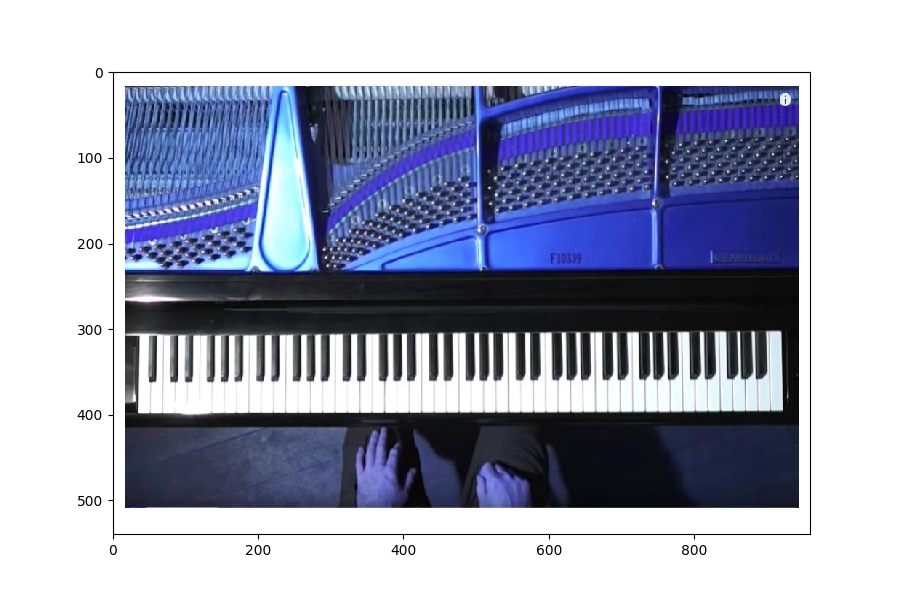

In [5]:
def colorShow(img):
    plt.figure(figsize = (9,6))
    plt.imshow(img, vmin=0, vmax=255,interpolation='nearest', aspect='auto')
    
def bwShow(img):
    plt.figure(figsize = (6,4))
    plt.imshow(img, cmap='gray', vmin=0, vmax=255,interpolation='nearest', aspect='auto')

#Verificando que la imagen subio 
# plt.imshow(img,  interpolation = 'bicubic')
# plt.xticks([]), plt.yticks([]) #Hide tick values on X and Y axis
# plt.show

img2 = img[:,:,::-1] 
colorShow(img) #(cv.cvtColor(img, cv.COLOR_BGR2RGB))

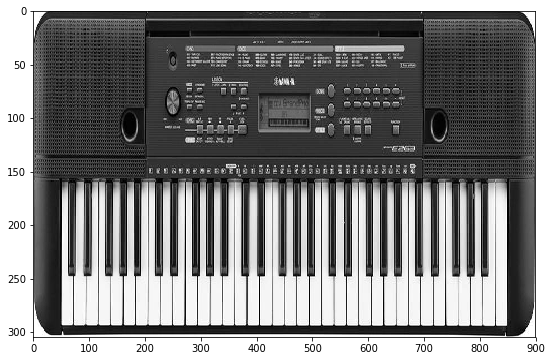

In [306]:
imgBW = cv.cvtColor(img, cv.COLOR_BGR2GRAY) 
bwShow(imgBW)
# myShowImg(blur)

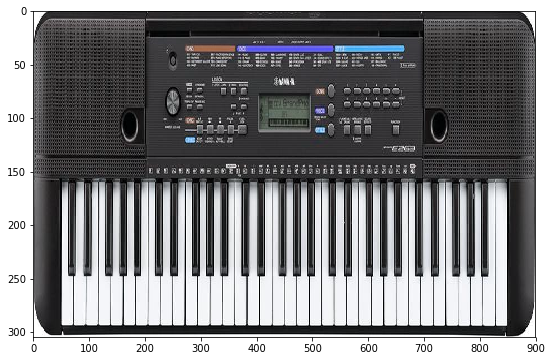

In [307]:
# normalizedImg = np.zeros((800, 800))
# imgResized = cv.resize(img, (800, 800))
imgNormal = cv.normalize(img, img, 0, 255, cv.NORM_MINMAX)
colorShow(imgNormal)

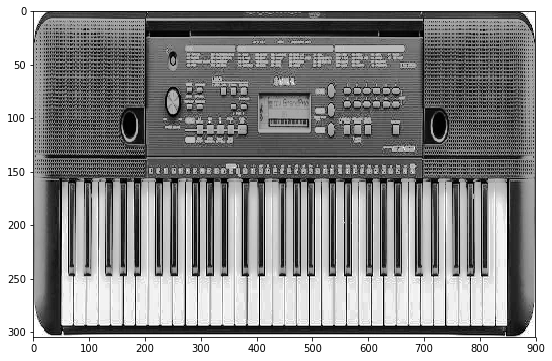

In [308]:
equ = cv.equalizeHist(imgBW)
bwShow(equ)

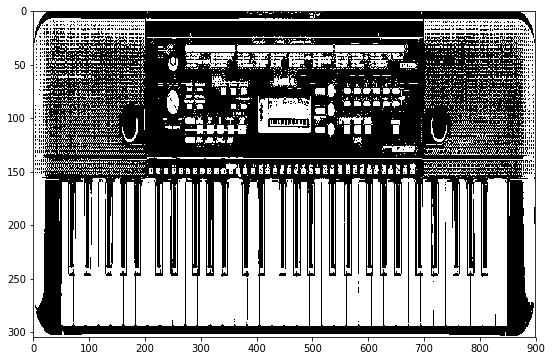

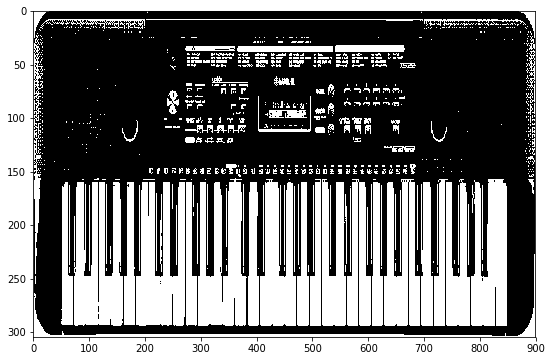

In [309]:
imgBW = cv.cvtColor(imgNormal, cv.COLOR_BGR2GRAY)
# bwShow(imgBW)
thresh1 = cv.threshold(equ,200, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)[1]
bwShow(thresh1)

thresh1 = cv.threshold(imgBW,100, 255, cv.THRESH_BINARY)[1]
bwShow(thresh1)

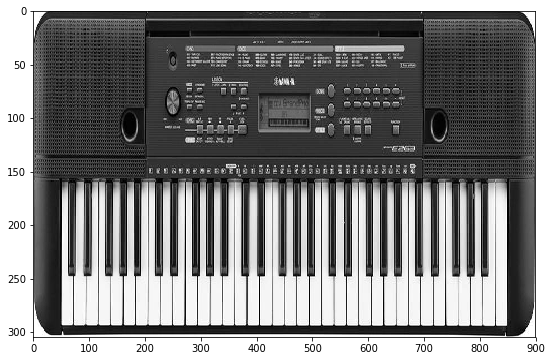

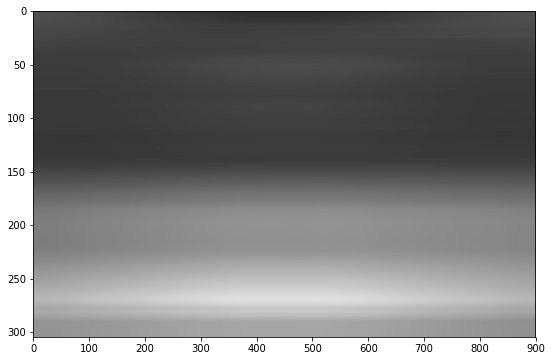

In [310]:
# blur = cv.bilateralFilter(img,100,750,75)

imgBW = cv.cvtColor(imgNormal, cv.COLOR_BGR2GRAY)
bwShow(imgBW)
blur = cv.blur(imgBW,(350, 1)) 
blur = cv.blur(blur,(350, 1)) 
blur = cv.blur(blur,(1, 50))
# blur = cv.medianBlur(blur, 15)
# thresh1 = cv.threshold(blur,14, 255, cv.THRESH_BINARY )[1]
# plt.figure(figsize = (9,6))
# plt.imshow(blur, cmap='gray', vmin=0, vmax=255,interpolation='nearest', aspect='auto')
bwShow(blur)

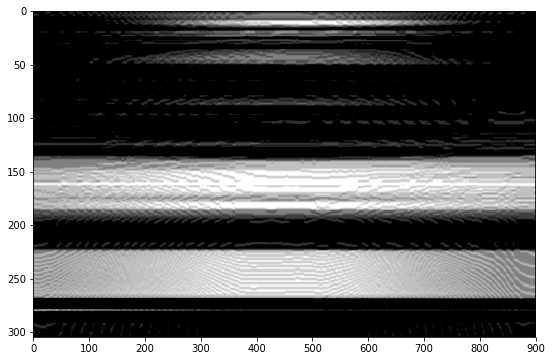

In [311]:
edges = cv.Sobel(blur,cv.CV_64F,0,1,ksize=5)

bwShow(edges)

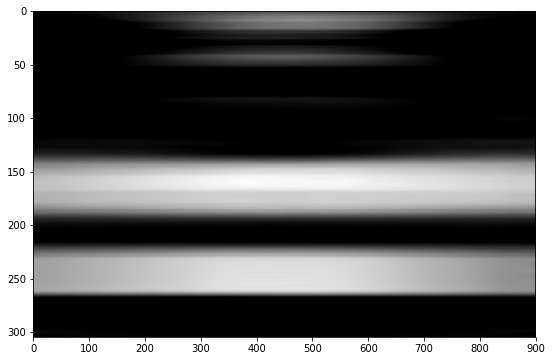

In [312]:
blurEdges = cv.blur(edges,(50, 15))
bwShow(blurEdges)

In [313]:
hist,bins = np.histogram(blurEdges.ravel(),256,[0,256])

# cv.calcHist(imgBW,[0],None,[256],[0,256])

result = np.where(hist == max(hist))
# print(hist)
# thresh1 = cv.threshold(blurEdges, 100, 255, 0)[1]
thresh1 = cv.threshold(blurEdges, 115, 255, 0)[1]
thresh1 = thresh1.astype(int)
thresh1 = np.array(thresh1,dtype='uint8')

<class 'numpy.ndarray'>


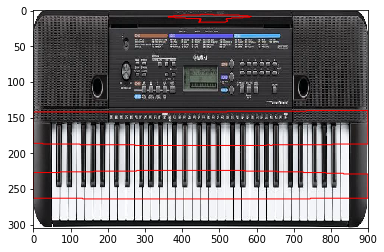

<Figure size 648x432 with 0 Axes>

In [314]:
import matplotlib.patches as patches
print(type(thresh1))
thresh1
im2, contours, hierarchy = cv.findContours(thresh1, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
# bwShow(thresh1)


fig,ax = plt.subplots(1)
plt.figure(figsize = (9,6))
ax.imshow(img,cmap='gray', vmin=0, vmax=255,interpolation='nearest', aspect='auto')
    #plt.figure(figsize = (9,6))
    #plt.imshow(img, cmap='gray', vmin=0, vmax=255,interpolation='nearest', aspect='auto')
    
for p in contours:
    reshapedP = p.reshape(p.shape[0],2)
    poly = patches.Polygon(reshapedP,linewidth=1,edgecolor='r',facecolor='none')
    ax.add_patch(poly)


In [315]:
imgBW = cv.cvtColor(img, cv.COLOR_BGR2GRAY) 
imgBW = cv.medianBlur(equ, 15)
hist,bins = np.histogram(imgBW.ravel(),256,[0,256])

# cv.calcHist(imgBW,[0],None,[256],[0,256])

result = np.where(hist == max(hist))
result

(array([240]),)

<class 'numpy.ndarray'>


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

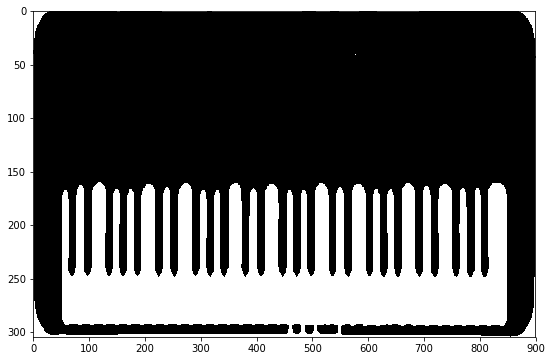

In [316]:
imgBW = cv.cvtColor(img, cv.COLOR_BGR2GRAY) 
imgBW = cv.medianBlur(imgBW, 15)
thresh1 = cv.threshold(imgBW, 115, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)[1] 

bwShow(thresh1)

# print(thresh1[200])
print(type(thresh1))
threshed = cv.adaptiveThreshold(thresh1, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 3, 0)
threshed 

Edge Detection 

<IPython.core.display.Javascript object>


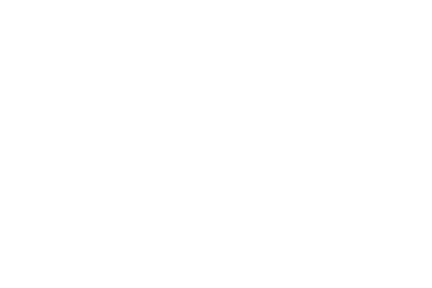

IndexError: list index out of range

<IPython.core.display.Javascript object>


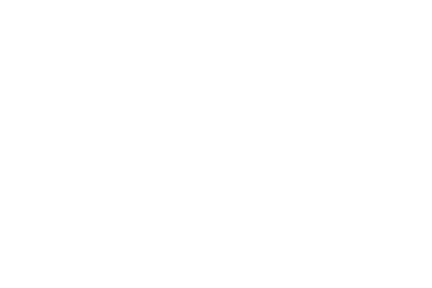

In [635]:
# img_binary = cv.threshold(imgBW, 120, 255, cv.THRESH_BINARY)[1]

imgray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(imgray, 115, 255, 0)
im2, contours, hierarchy = cv.findContours(thresh1, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

bwShow(im2)
contours[2]

# contours, hierarchy = cv.findContours(imgbinary, cv.RETR_FLOODFILL , cv.CHAIN_APPROX_NONE)import matplotlib.patches as patches
import matplotlib.patches as patches
fig,ax = plt.subplots(1)
ax.imshow(im2)
# Create a Rectangle patch
rect = patches.Rectangle((50,100),40,30,linewidth=1,edgecolor='r',facecolor='none')
print(contours[2])
print(contours[2].reshape(939, 2))
poly = patches.Polygon(contours[2].reshape(939, 2),linewidth=1,edgecolor='r',facecolor='none')

ax.add_patch(rect)
ax.add_patch(poly)

Escoger Upper Left, Lower Right

In [33]:
import numpy as np 
import cv2 as cv
from matplotlib import pyplot as plt
import matplotlib.patches as patches
# from google.colab.patches import cv2_imshow

<IPython.core.display.Javascript object>


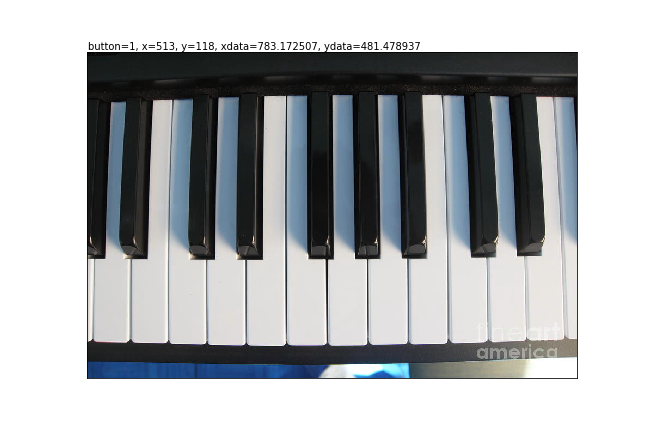

In [35]:
%matplotlib notebook
fileName = "images/examples/piano-from-above-samiksa-art.jpg"
# fileName = "images/examples/blackkeybd.jpg"
# fileName = "redkbd.jpg"
# fileName = "paul01.jpg"
img = cv.imread(fileName,-1)


fig = plt.figure(figsize = (9,6))
ax = fig.add_subplot(111)
plt.xticks([]), plt.yticks([])
ax.imshow(img)
text=ax.text(0,0, "", va="bottom", ha="left")
coords = []
def onclick(event):
    tx = 'button=%d, x=%d, y=%d, xdata=%f, ydata=%f' % (event.button, event.x, event.y, event.xdata, event.ydata)
    text.set_text(tx)
    coords.append([event.xdata, event.ydata])

cid = fig.canvas.mpl_connect('button_press_event', onclick)

In [36]:
print(coords)
crop_img = img[int(coords[0][1]):int(coords[1][1]), int(coords[0][0]):int(coords[1][0])]
# bwShow(crop_img)

[[54.695686166298714, 124.5988778513613], [783.1725073583516, 481.47893671817513]]


<IPython.core.display.Javascript object>


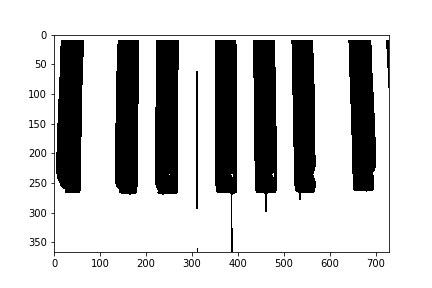

In [37]:
imgBW = cv.cvtColor(crop_img, cv.COLOR_BGR2GRAY) 
imgBW = cv.medianBlur(imgBW, 5)
thresh1 = cv.threshold(imgBW, 110, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)[1] 

marron = thresh1

# the number of lines added to the top to distinguish the keys
times = 10

marron = np.append(times*[[255]*thresh1.shape[1]],(thresh1))
marron = marron.reshape(thresh1.shape[0]+times,thresh1.shape[1])

marron = marron.astype(int)
marron = np.array(marron,dtype='uint8')
                   
bwShow(marron)


[[161, 12], [186, 11], [224, 10], [252, 9], [290, 8], [316, 7], [341, 6], [379, 5], [407, 4], [446, 3], [471, 2], [497, 1]]
[25, 38, 28, 38, 26, 25, 38, 28, 39, 25, 26]
26.142857142857142 38.25
[0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0]
01010
G#


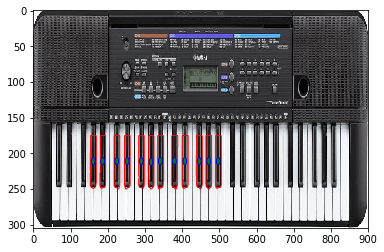

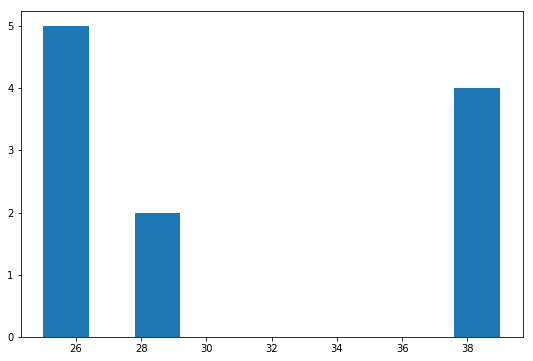

In [31]:
%matplotlib inline
import statistics
im2, contours, hierarchy = cv.findContours(marron, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
# bwShow(marron)


fig,ax = plt.subplots(1)
plt.figure(figsize = (9,6))
ax.imshow(img,cmap='gray', vmin=0, vmax=255,interpolation='nearest', aspect='auto')
    #plt.figure(figsize = (9,6))
    #plt.imshow(img, cmap='gray', vmin=0, vmax=255,interpolation='nearest', aspect='auto')

listOfAreas = []
for p in contours:
    listOfAreas.append(cv.contourArea(p))
medianArea = statistics.median(listOfAreas)
deltaX = int(coords[0][0]) 
deltaY = int(coords[0][1]) - times

centroidXList = []
i = 0
for p in contours:
    if cv.contourArea(p) < 30 * medianArea:
        reshapedP = p.reshape(p.shape[0],2)
        reshapedP = reshapedP + [int(coords[0][0]),deltaY]
        
        M = cv.moments(p)
        cx = int(M['m10']/M['m00'])
        cy = int(M['m01']/M['m00'])
        centroid = [cx + deltaX,cy + deltaY]
        
        centroidXList.append([ centroid[0], i ]);
        
        poly = patches.Polygon(reshapedP,linewidth=1,edgecolor='r',facecolor='none')
        ax.add_patch(poly)
        circ = patches.Circle(centroid,radius=5,edgecolor='b',facecolor='g')
        ax.add_patch(circ)
    i = i + 1

        
from operator import itemgetter
centroidXList = sorted(centroidXList, key=itemgetter(0))
print(centroidXList)

diffList = []
for i in range(len(centroidXList)-1):
    diffList.append(centroidXList[i + 1][0] - centroidXList[i][0])

print(diffList)
maxVal =  max(diffList)
minVal =  min(diffList)
halfVal = (maxVal + minVal) / 2

meanLow = statistics.mean([x for x in diffList if x <= halfVal])
meanHigh = statistics.mean([x for x in diffList if x > halfVal])

distList = []
for i in diffList:
    if abs(i - meanLow) < abs(i - meanHigh):
        distList.append(0)
    else:
        distList.append(1)

print(meanLow, meanHigh)
print(distList)
plt.hist(diffList)
        
distNoteMap = {'10100': "Bb", '01001': "C#", '10010': "D#", '00101': "F#",'01010': "G#"}

stDistChunck = ''.join(str(e) for e in distList[0:5])

print(stDistChunck)
if stDistChunck in distNoteMap:
    print(distNoteMap[stDistChunck])


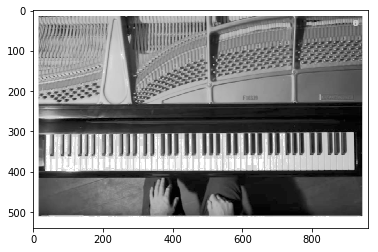

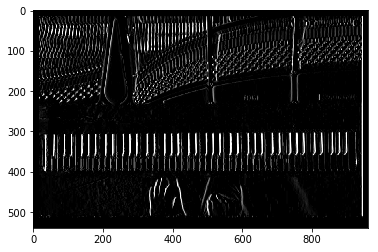

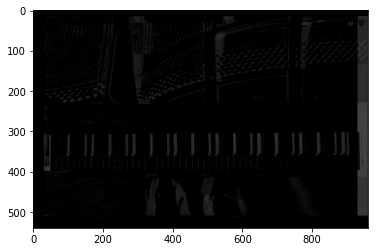

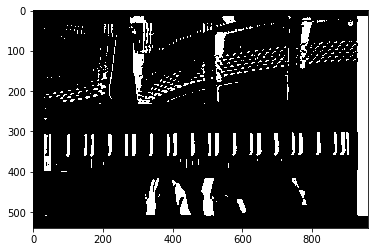

In [605]:
imgBW = cv.cvtColor(img, cv.COLOR_BGR2GRAY) 
equ = cv.equalizeHist(imgBW)
equ = cv.blur(equ,(3, 1))
bwShow(equ)
edges = cv.Sobel(equ,cv.CV_64F,1,0,ksize=3)
bwShow(edges)
edgesBlurred = cv.blur(edges,(30, 1))
bwShow(edgesBlurred)
threshEdgesBlurred = cv.threshold(edgesBlurred, 13, 255, cv.THRESH_BINARY )[1] 
bwShow(threshEdgesBlurred)